In [4]:
import pandas as pd

data  = pd.read_csv("dds_ch2_nyt/nyt8.csv")
data

,Age,Gender,Impressions,Clicks,Signed_In
0,52,0,4,0,1
1,43,1,6,0,1
2,36,0,2,0,1
3,0,0,6,0,0
4,24,0,4,0,1
...,...,...,...,...,...
463191,46,1,3,0,1
463192,60,1,5,0,1
463193,26,1,6,0,1
463194,0,0,6,0,0


In [5]:
validated_users = data[(data.Signed_In == 1) & (data.Age > 0)]
validated_users

,Age,Gender,Impressions,Clicks,Signed_In
0,52,0,4,0,1
1,43,1,6,0,1
2,36,0,2,0,1
4,24,0,4,0,1
5,37,1,4,0,1
...,...,...,...,...,...
463190,19,0,7,0,1
463191,46,1,3,0,1
463192,60,1,5,0,1
463193,26,1,6,0,1


In [6]:
def get_age_group(data):
    if data < 18:
        return "<18"
    if data <= 24:
        return "18-24"
    if data <= 34:
        return "25-34"
    if data <= 44:
        return "35-44"
    if data <= 54:
        return "45-54"
    if data <= 64:
        return "55-64"
    return "65+"



validated_users["age_group"] = validated_users['Age'].apply(lambda x: get_age_group(x))
validated_users

/var/folders/h5/0sm7xyj948950qwc8qlp4sbc0000gn/T/ipykernel_26864/1735515836.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validated_users["age_group"] = validated_users['Age'].apply(lambda x: get_age_group(x))


,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,52,0,4,0,1,45-54
1,43,1,6,0,1,35-44
2,36,0,2,0,1,35-44
4,24,0,4,0,1,18-24
5,37,1,4,0,1,35-44
...,...,...,...,...,...,...
463190,19,0,7,0,1,18-24
463191,46,1,3,0,1,45-54
463192,60,1,5,0,1,55-64
463193,26,1,6,0,1,25-34


In [7]:
validated_users["CTR"] = validated_users.Clicks / validated_users.Impressions
validated_users

/var/folders/h5/0sm7xyj948950qwc8qlp4sbc0000gn/T/ipykernel_26864/3594768635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validated_users["CTR"] = validated_users.Clicks / validated_users.Impressions


,Age,Gender,Impressions,Clicks,Signed_In,age_group,CTR
0,52,0,4,0,1,45-54,0.0
1,43,1,6,0,1,35-44,0.0
2,36,0,2,0,1,35-44,0.0
4,24,0,4,0,1,18-24,0.0
5,37,1,4,0,1,35-44,0.0
...,...,...,...,...,...,...,...
463190,19,0,7,0,1,18-24,0.0
463191,46,1,3,0,1,45-54,0.0
463192,60,1,5,0,1,55-64,0.0
463193,26,1,6,0,1,25-34,0.0


In [8]:
user_grouped_by_age = validated_users[["Age", "Impressions", "Clicks", "age_group", "CTR"]].groupby("age_group").mean()
user_grouped_by_age

,Age,Impressions,Clicks,CTR
age_group,,,,
18-24,20.848369,4.990248,0.054748,0.011086
25-34,29.490524,5.010164,0.049187,0.009998
35-44,39.508942,4.998934,0.050245,0.010110
45-54,49.506655,4.993568,0.048803,0.009688
55-64,59.492097,5.012066,0.100974,0.020087
65+,72.920588,5.001725,0.149303,0.029997
<18,15.250196,4.979061,0.151129,0.029933


<AxesSubplot: xlabel='age_group', ylabel='CTR'>

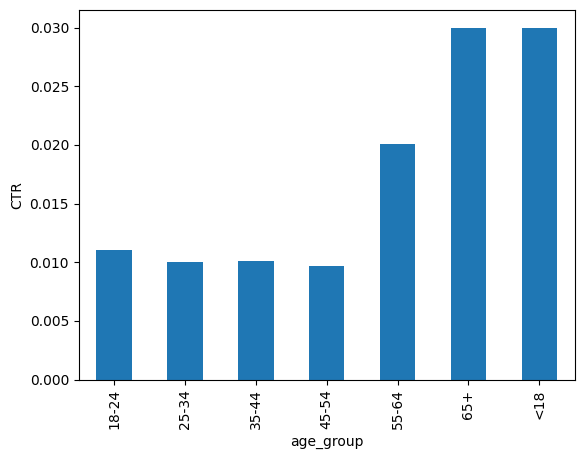

In [9]:
user_grouped_by_age.CTR.plot(kind="bar", ylabel="CTR")

<AxesSubplot: xlabel='Gender', ylabel='CTR median'>

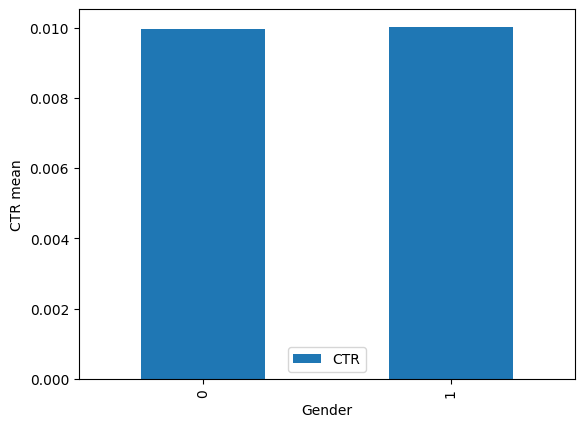

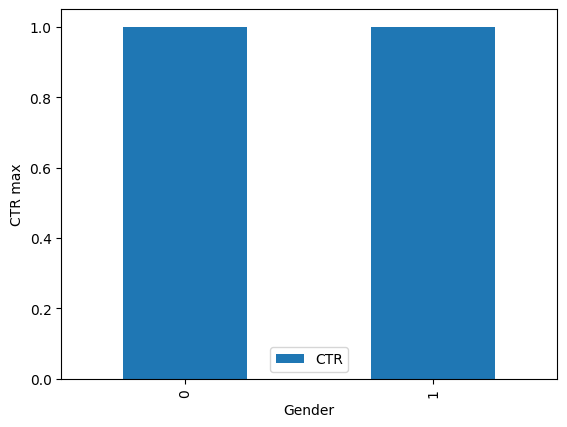

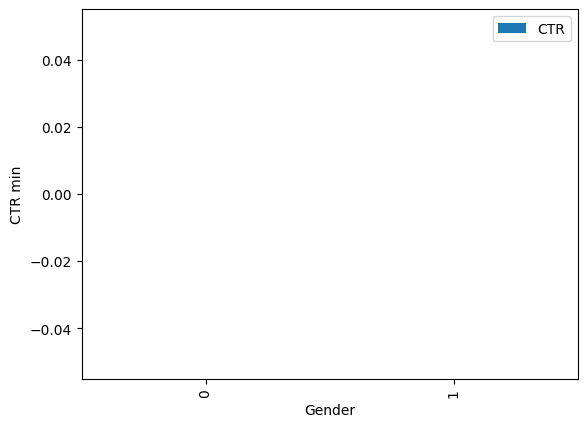

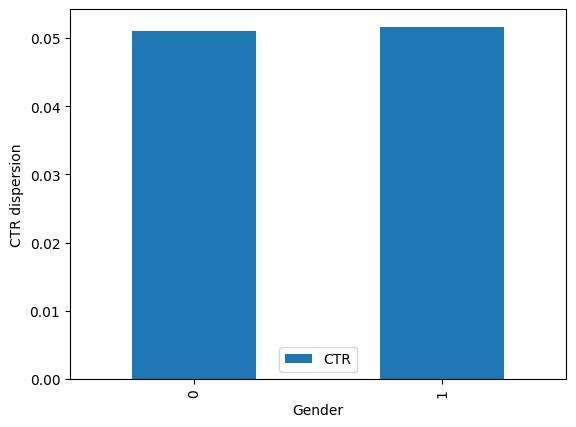

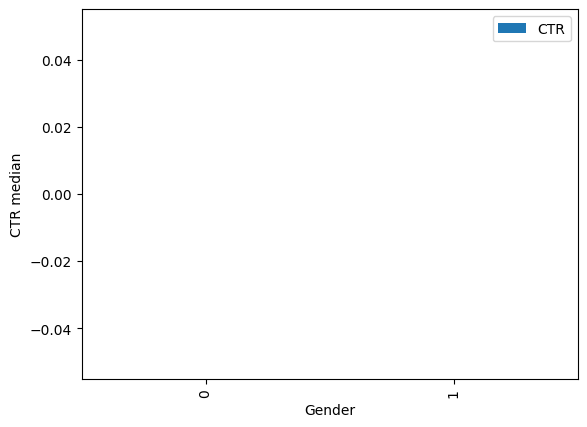

In [10]:
filtration = validated_users["age_group"] == "25-34"
groupBy = 'Gender'
columns = ["CTR"]
grouped_data_genders = validated_users.loc[filtration].groupby(groupBy)[columns]

mean = grouped_data_genders.mean()
maxU = grouped_data_genders.max()
minU = grouped_data_genders.min()
dispersion = grouped_data_genders.std()
median = grouped_data_genders.median()


mean.plot(kind="bar", ylabel="CTR mean")
maxU.plot(kind="bar", ylabel="CTR max")
minU.plot(kind="bar", ylabel="CTR min")
dispersion.plot(kind="bar", ylabel="CTR dispersion")
median.plot(kind="bar", ylabel="CTR median")


<AxesSubplot: xlabel='Gender(1-male, 2-female) Age_group', ylabel='Clicks mean'>

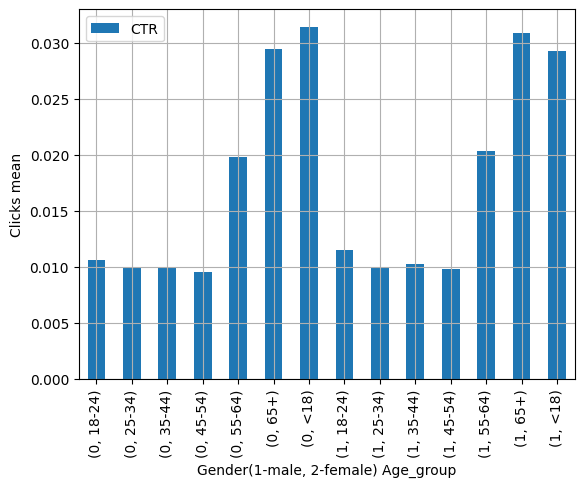

In [11]:
groupBy = ['Gender', 'age_group']
columns = ["CTR"]
group2 = validated_users.groupby(groupBy)[columns]

group2.mean().plot(kind="bar", grid = "true", xlabel="Gender(1-male, 2-female) Age_group", ylabel="Clicks mean")

In [12]:
filtration = ["age_group", "CTR"]
groupBy = 'age_group'
columns = ["CTR"]
final_users = validated_users[filtration].groupby(groupBy).mean()


final_users["max_CTR"] = final_users.CTR.max()
final_users["min_CTR"] = final_users.CTR.min()
final_users["std_CTR"] = final_users.CTR.std()
final_users["median_CTR"] = final_users.CTR.median()

final_users

,CTR,max_CTR,min_CTR,std_CTR,median_CTR
age_group,,,,,
18-24,0.011086,0.029997,0.009688,0.0094,0.011086
25-34,0.009998,0.029997,0.009688,0.0094,0.011086
35-44,0.010110,0.029997,0.009688,0.0094,0.011086
45-54,0.009688,0.029997,0.009688,0.0094,0.011086
55-64,0.020087,0.029997,0.009688,0.0094,0.011086
65+,0.029997,0.029997,0.009688,0.0094,0.011086
<18,0.029933,0.029997,0.009688,0.0094,0.011086
